## About Dataset

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000 dollars.

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in 1000's dollars

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("HousingData.csv")

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Data Preprocessing

In [ ]:
data.shape #dimension of the data with 506 rows and 14 columns

(506, 14)

In [ ]:
data.info()    # dataframe information with their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
data.isnull().any() #here we found that their are null values in the data

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

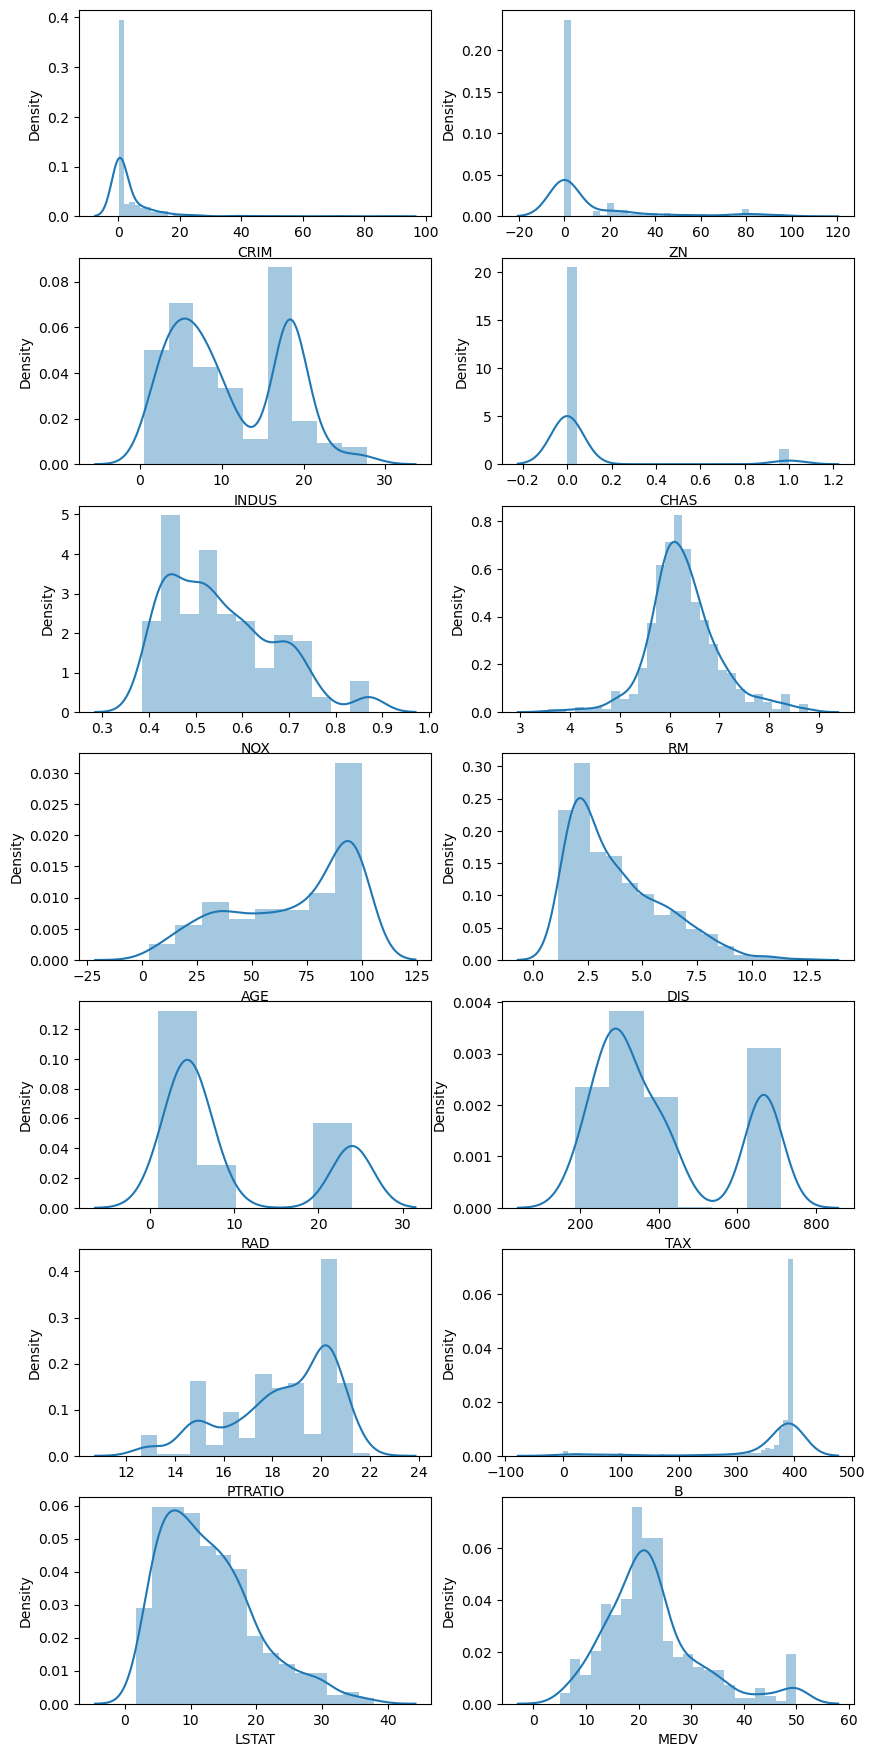

In [ ]:
#data distibution
plt.figure(figsize=(10,22))
plt.subplot(7,2,1)
sns.distplot(data['CRIM'])
plt.xlabel('CRIM')
plt.subplot(7,2,2)
sns.distplot(data['ZN'])
plt.subplot(7,2,3)
sns.distplot(data['INDUS'])
plt.subplot(7,2,4)
sns.distplot(data['CHAS'])
plt.subplot(7,2,5)
sns.distplot(data['NOX'])
plt.subplot(7,2,6)
sns.distplot(data['RM'])
plt.subplot(7,2,7)
sns.distplot(data['AGE'])
plt.subplot(7,2,8)
sns.distplot(data['DIS'])
plt.subplot(7,2,9)
sns.distplot(data['RAD'])
plt.subplot(7,2,10)
sns.distplot(data['TAX'])
plt.subplot(7,2,11)
sns.distplot(data['PTRATIO'])
plt.subplot(7,2,12)
sns.distplot(data['B'])
plt.subplot(7,2,13)
sns.distplot(data['LSTAT'])
plt.subplot(7,2,14)
sns.distplot(data['MEDV'])


## Handling the missing values

In [ ]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
data.isnull().sum().sum()

120

In [ ]:
#Replacing Null values with the median snice the dataset consists of outliers
data['CRIM'] = data['CRIM'].fillna(data['CRIM'].median())
data['ZN'] = data['ZN'].fillna(data['ZN'].median())
data['INDUS'] = data['INDUS'].fillna(data['INDUS'].median())
data['CHAS'] = data['CHAS'].fillna(data['CHAS'].median())
data['AGE'] = data['AGE'].fillna(data['AGE'].median())
data['LSTAT'] = data['LSTAT'].fillna(data['LSTAT'].median())

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
data.isnull().sum()  # after filling the null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Outliers Detection

<AxesSubplot:xlabel='MEDV'>

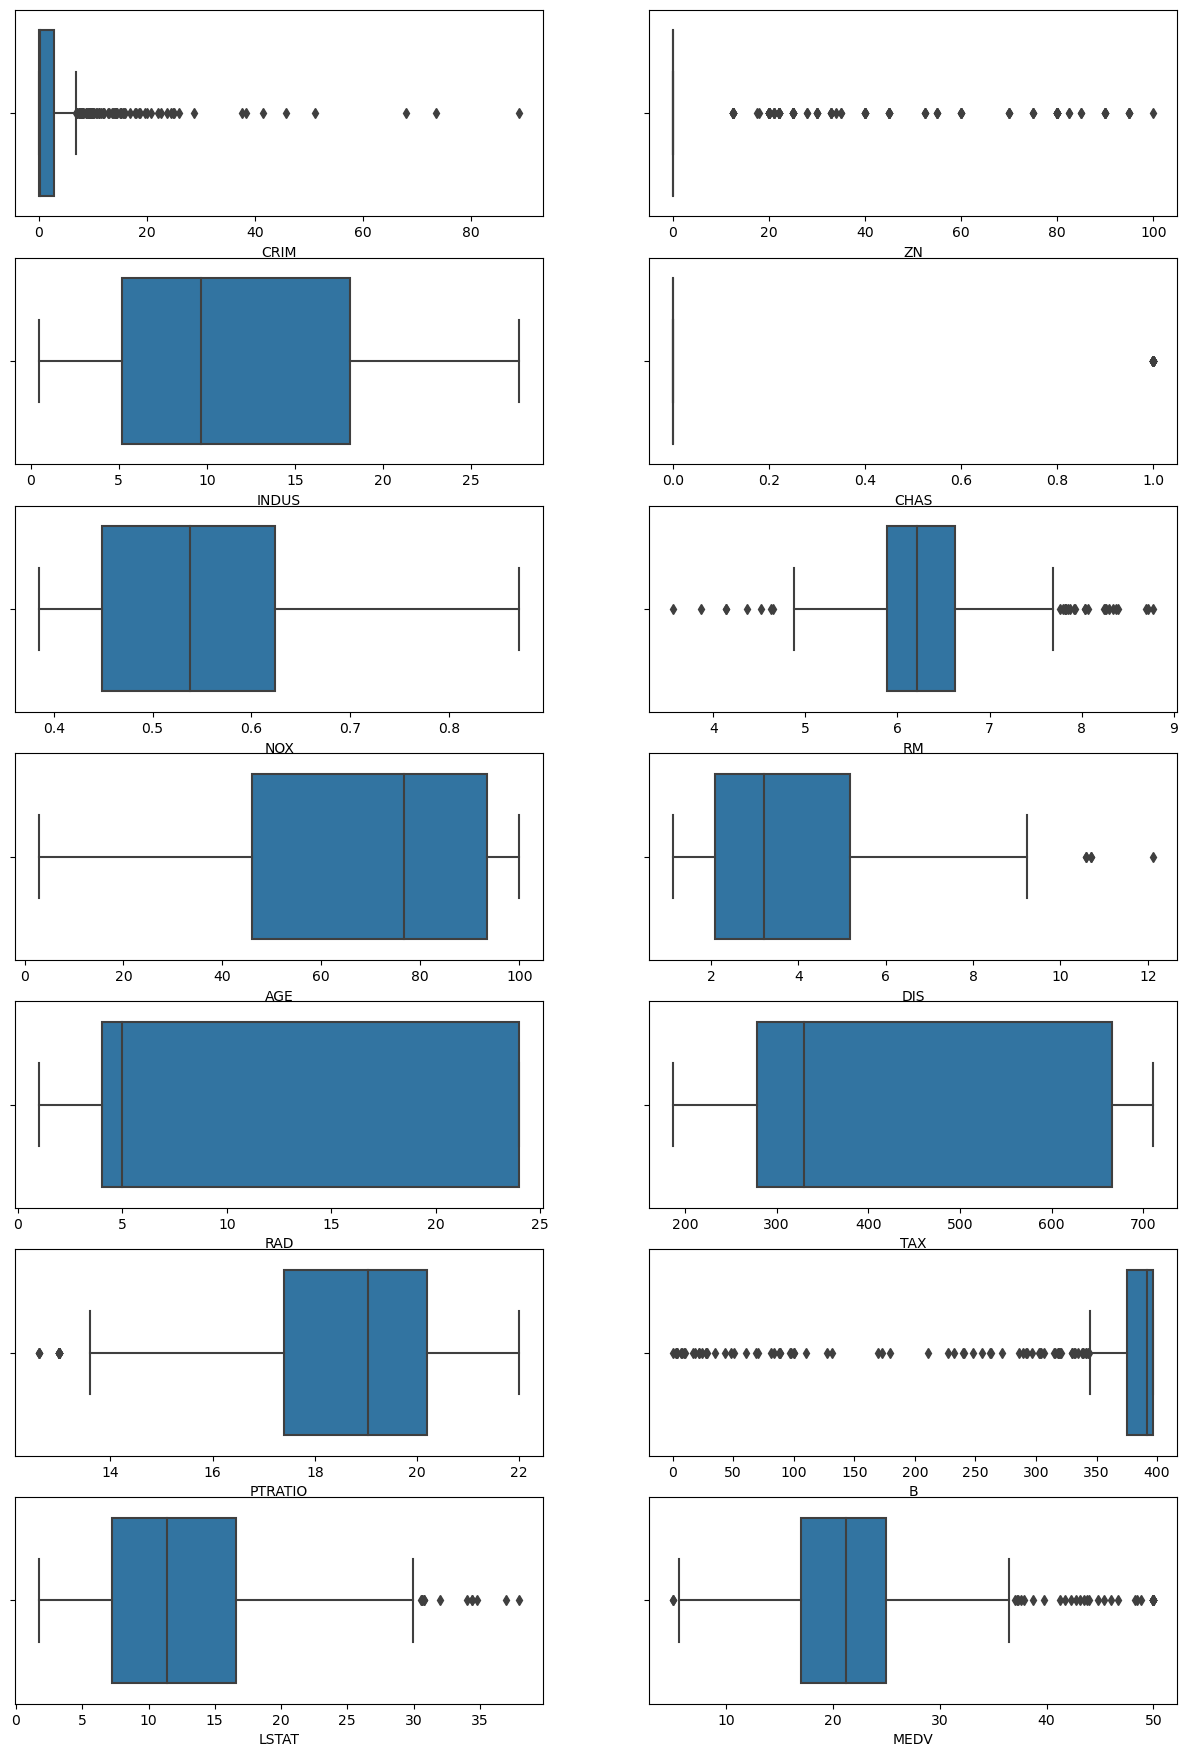

In [ ]:
plt.figure(figsize=(15,22))
plt.subplot(7,2,1)
sns.boxplot(data['CRIM'])
plt.subplot(7,2,2)
sns.boxplot(data['ZN'])
plt.subplot(7,2,3)
sns.boxplot(data['INDUS'])
plt.subplot(7,2,4)
sns.boxplot(data['CHAS'])
plt.subplot(7,2,5)
sns.boxplot(data['NOX'])
plt.subplot(7,2,6)
sns.boxplot(data['RM'])
plt.subplot(7,2,7)
sns.boxplot(data['AGE'])
plt.subplot(7,2,8)
sns.boxplot(data['DIS'])
plt.subplot(7,2,9)
sns.boxplot(data['RAD'])
plt.subplot(7,2,10)
sns.boxplot(data['TAX'])
plt.subplot(7,2,11)
sns.boxplot(data['PTRATIO'])
plt.subplot(7,2,12)
sns.boxplot(data['B'])
plt.subplot(7,2,13)
sns.boxplot(data['LSTAT'])
plt.subplot(7,2,14)
sns.boxplot(data['MEDV'])

### Outlier detection and replacement by IQR techinque

In [ ]:
percentile25=data['CRIM'].quantile(0.25) # Calculating 25th Quantile
percentile75=data['CRIM'].quantile(0.75) # Calculating 75th Quantile
iqr=percentile75-percentile25 # Finding Inter Quantile Range
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

25th percentile -  0.083235 75th percentile -  2.80872
Upper Limit -  6.8969475000000005 Lower Limit -  -4.0049925


In [ ]:
data['CRIM'] = np.where(data['CRIM'] > upper_limit, upper_limit,
                 np.where(data['CRIM'] < lower_limit, lower_limit,data['CRIM']))

{'whiskers': [<matplotlib.lines.Line2D at 0x252b4dd6880>,
 'caps': [<matplotlib.lines.Line2D at 0x252b4dd6e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x252b4dd66d0>],
 'medians': [<matplotlib.lines.Line2D at 0x252b4de4400>],
 'fliers': [<matplotlib.lines.Line2D at 0x252b4de46d0>],
 'means': []}

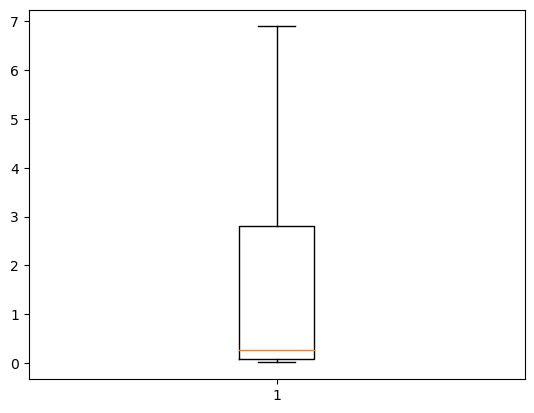

In [ ]:
plt.boxplot(data.CRIM)

In [ ]:
percentile25=data['ZN'].quantile(0.25)
percentile75=data['ZN'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

25th percentile -  0.0 75th percentile -  0.0
Upper Limit -  0.0 Lower Limit -  0.0


In [ ]:
data['ZN'] = np.where(data['ZN'] > upper_limit, upper_limit,
                 np.where(data['ZN'] < lower_limit, lower_limit,data['ZN']))

{'whiskers': [<matplotlib.lines.Line2D at 0x252b4e041f0>,
 'caps': [<matplotlib.lines.Line2D at 0x252b4e04790>,
 'boxes': [<matplotlib.lines.Line2D at 0x252b4f67d30>],
 'medians': [<matplotlib.lines.Line2D at 0x252b4e04d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x252b4e11040>],
 'means': []}

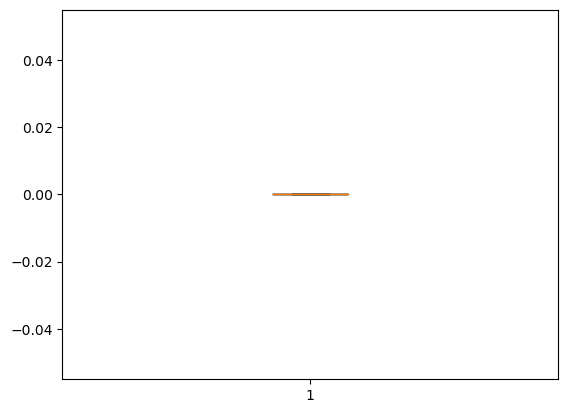

In [ ]:
plt.boxplot(data.ZN)

25th percentile -  0.0 75th percentile -  0.0
Upper Limit -  0.0 Lower Limit -  0.0


{'whiskers': [<matplotlib.lines.Line2D at 0x252b4e5c850>,
 'caps': [<matplotlib.lines.Line2D at 0x252b4e5cdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x252b4e5c580>],
 'medians': [<matplotlib.lines.Line2D at 0x252b4e6b3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x252b4e6b6a0>],
 'means': []}

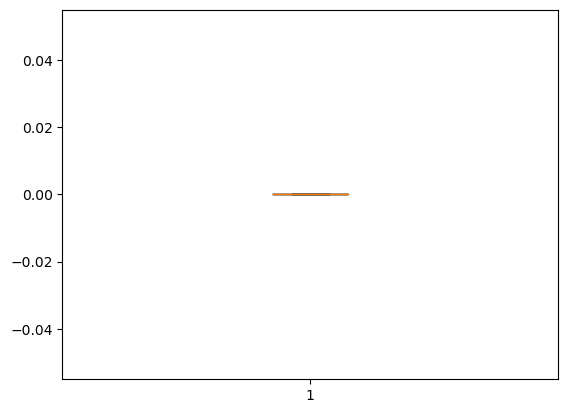

In [ ]:
percentile25=data['CHAS'].quantile(0.25)
percentile75=data['CHAS'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

data['CHAS'] = np.where(data['CHAS'] > upper_limit, upper_limit,
                 np.where(data['CHAS'] < lower_limit, lower_limit,data['CHAS']))

plt.boxplot(data.CHAS)

25th percentile -  5.8854999999999995 75th percentile -  6.6235
Upper Limit -  7.730500000000001 Lower Limit -  4.778499999999999


{'whiskers': [<matplotlib.lines.Line2D at 0x252b4ebf340>,
 'caps': [<matplotlib.lines.Line2D at 0x252b4ebf8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x252b4ebf070>],
 'medians': [<matplotlib.lines.Line2D at 0x252b4ebfe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x252b4ecf190>],
 'means': []}

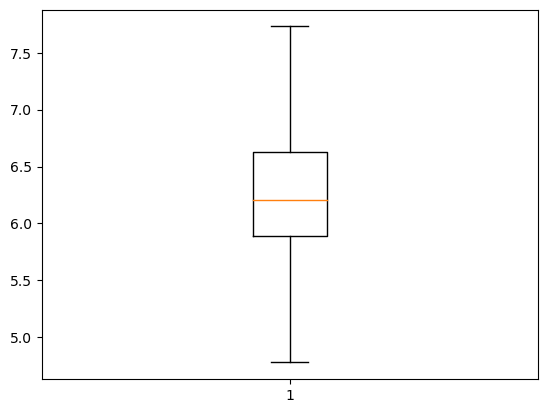

In [ ]:
percentile25=data['RM'].quantile(0.25)
percentile75=data['RM'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

data['RM'] = np.where(data['RM'] > upper_limit, upper_limit,
                 np.where(data['RM'] < lower_limit, lower_limit,data['RM']))

plt.boxplot(data.RM)

25th percentile -  2.100175 75th percentile -  5.1884250000000005
Upper Limit -  9.820800000000002 Lower Limit -  -2.5322000000000005


{'whiskers': [<matplotlib.lines.Line2D at 0x252b4f02880>,
 'caps': [<matplotlib.lines.Line2D at 0x252b4f02e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x252b4f025b0>],
 'medians': [<matplotlib.lines.Line2D at 0x252b4f10400>],
 'fliers': [<matplotlib.lines.Line2D at 0x252b4f106d0>],
 'means': []}

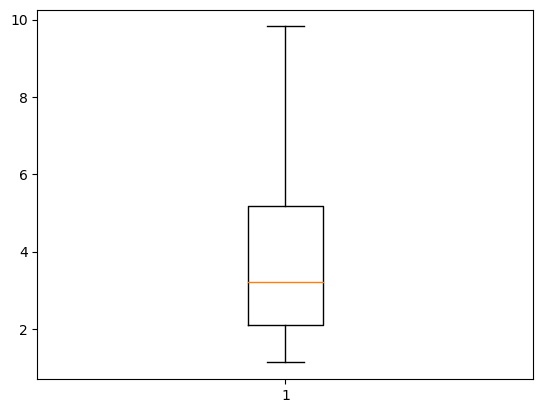

In [ ]:
percentile25=data['DIS'].quantile(0.25)
percentile75=data['DIS'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

data['DIS'] = np.where(data['DIS'] > upper_limit, upper_limit,
                 np.where(data['DIS'] < lower_limit, lower_limit,data['DIS']))

plt.boxplot(data.DIS)

25th percentile -  17.4 75th percentile -  20.2
Upper Limit -  24.4 Lower Limit -  13.199999999999998


{'whiskers': [<matplotlib.lines.Line2D at 0x252b4f9d1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x252b4f9d790>,
 'boxes': [<matplotlib.lines.Line2D at 0x252b4f90ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x252b4f9dd30>],
 'fliers': [<matplotlib.lines.Line2D at 0x252b4fa8040>],
 'means': []}

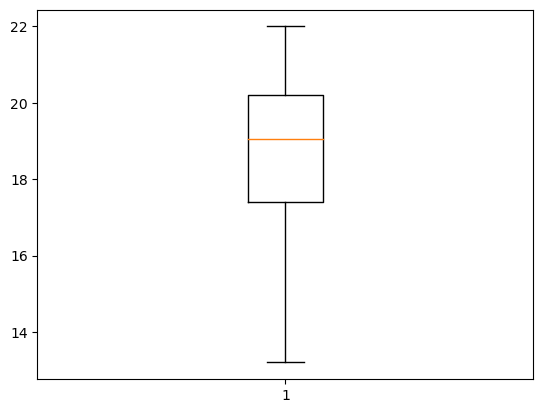

In [ ]:
percentile25=data['PTRATIO'].quantile(0.25)
percentile75=data['PTRATIO'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

data['PTRATIO'] = np.where(data['PTRATIO'] > upper_limit, upper_limit,
                 np.where(data['PTRATIO'] < lower_limit, lower_limit,data['PTRATIO']))

plt.boxplot(data.PTRATIO)

25th percentile -  375.3775 75th percentile -  396.225
Upper Limit -  427.49625000000003 Lower Limit -  344.10624999999993


{'whiskers': [<matplotlib.lines.Line2D at 0x252b4fe8ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x252b4ff6280>,
 'boxes': [<matplotlib.lines.Line2D at 0x252b4fe89d0>],
 'medians': [<matplotlib.lines.Line2D at 0x252b4ff6820>],
 'fliers': [<matplotlib.lines.Line2D at 0x252b4ff6af0>],
 'means': []}

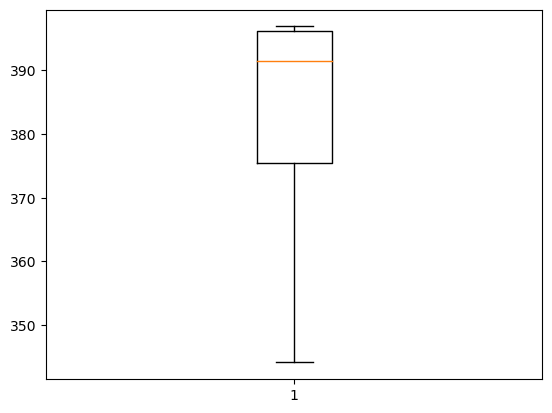

In [ ]:
percentile25=data['B'].quantile(0.25)
percentile75=data['B'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

data['B'] = np.where(data['B'] > upper_limit, upper_limit,
                 np.where(data['B'] < lower_limit, lower_limit,data['B']))

plt.boxplot(data.B)

25th percentile -  7.2299999999999995 75th percentile -  16.57
Upper Limit -  30.58 Lower Limit -  -6.78


{'whiskers': [<matplotlib.lines.Line2D at 0x252b504f5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x252b504fb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x252b504f310>],
 'medians': [<matplotlib.lines.Line2D at 0x252b505c160>],
 'fliers': [<matplotlib.lines.Line2D at 0x252b505c430>],
 'means': []}

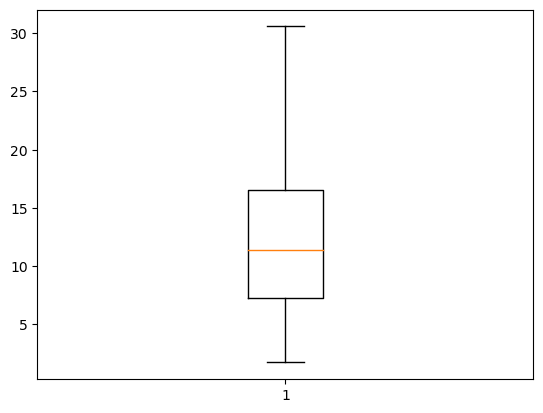

In [ ]:
percentile25=data['LSTAT'].quantile(0.25)
percentile75=data['LSTAT'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

data['LSTAT'] = np.where(data['LSTAT'] > upper_limit, upper_limit,
                 np.where(data['LSTAT'] < lower_limit, lower_limit,data['LSTAT']))

plt.boxplot(data.LSTAT)

25th percentile -  17.025 75th percentile -  25.0
Upper Limit -  36.962500000000006 Lower Limit -  5.0624999999999964


{'whiskers': [<matplotlib.lines.Line2D at 0x252b50b1670>,
 'caps': [<matplotlib.lines.Line2D at 0x252b50b1c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x252b50b13a0>],
 'medians': [<matplotlib.lines.Line2D at 0x252b50be1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x252b50be4c0>],
 'means': []}

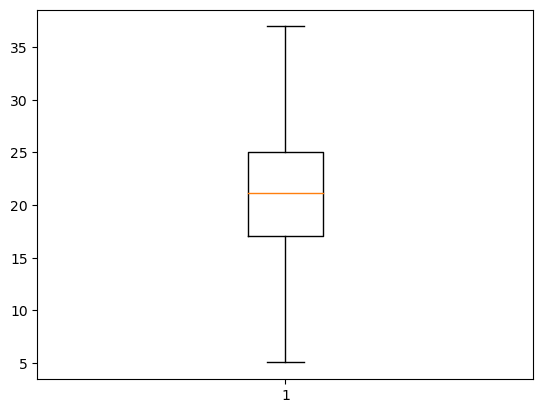

In [ ]:
percentile25=data['MEDV'].quantile(0.25)
percentile75=data['MEDV'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print('25th percentile - ',percentile25,'75th percentile - ',percentile75)
print('Upper Limit - ',upper_limit,'Lower Limit - ',lower_limit)

data['MEDV'] = np.where(data['MEDV'] > upper_limit, upper_limit,
                 np.where(data['MEDV'] < lower_limit, lower_limit,data['MEDV']))

plt.boxplot(data.MEDV)

<AxesSubplot:xlabel='MEDV'>

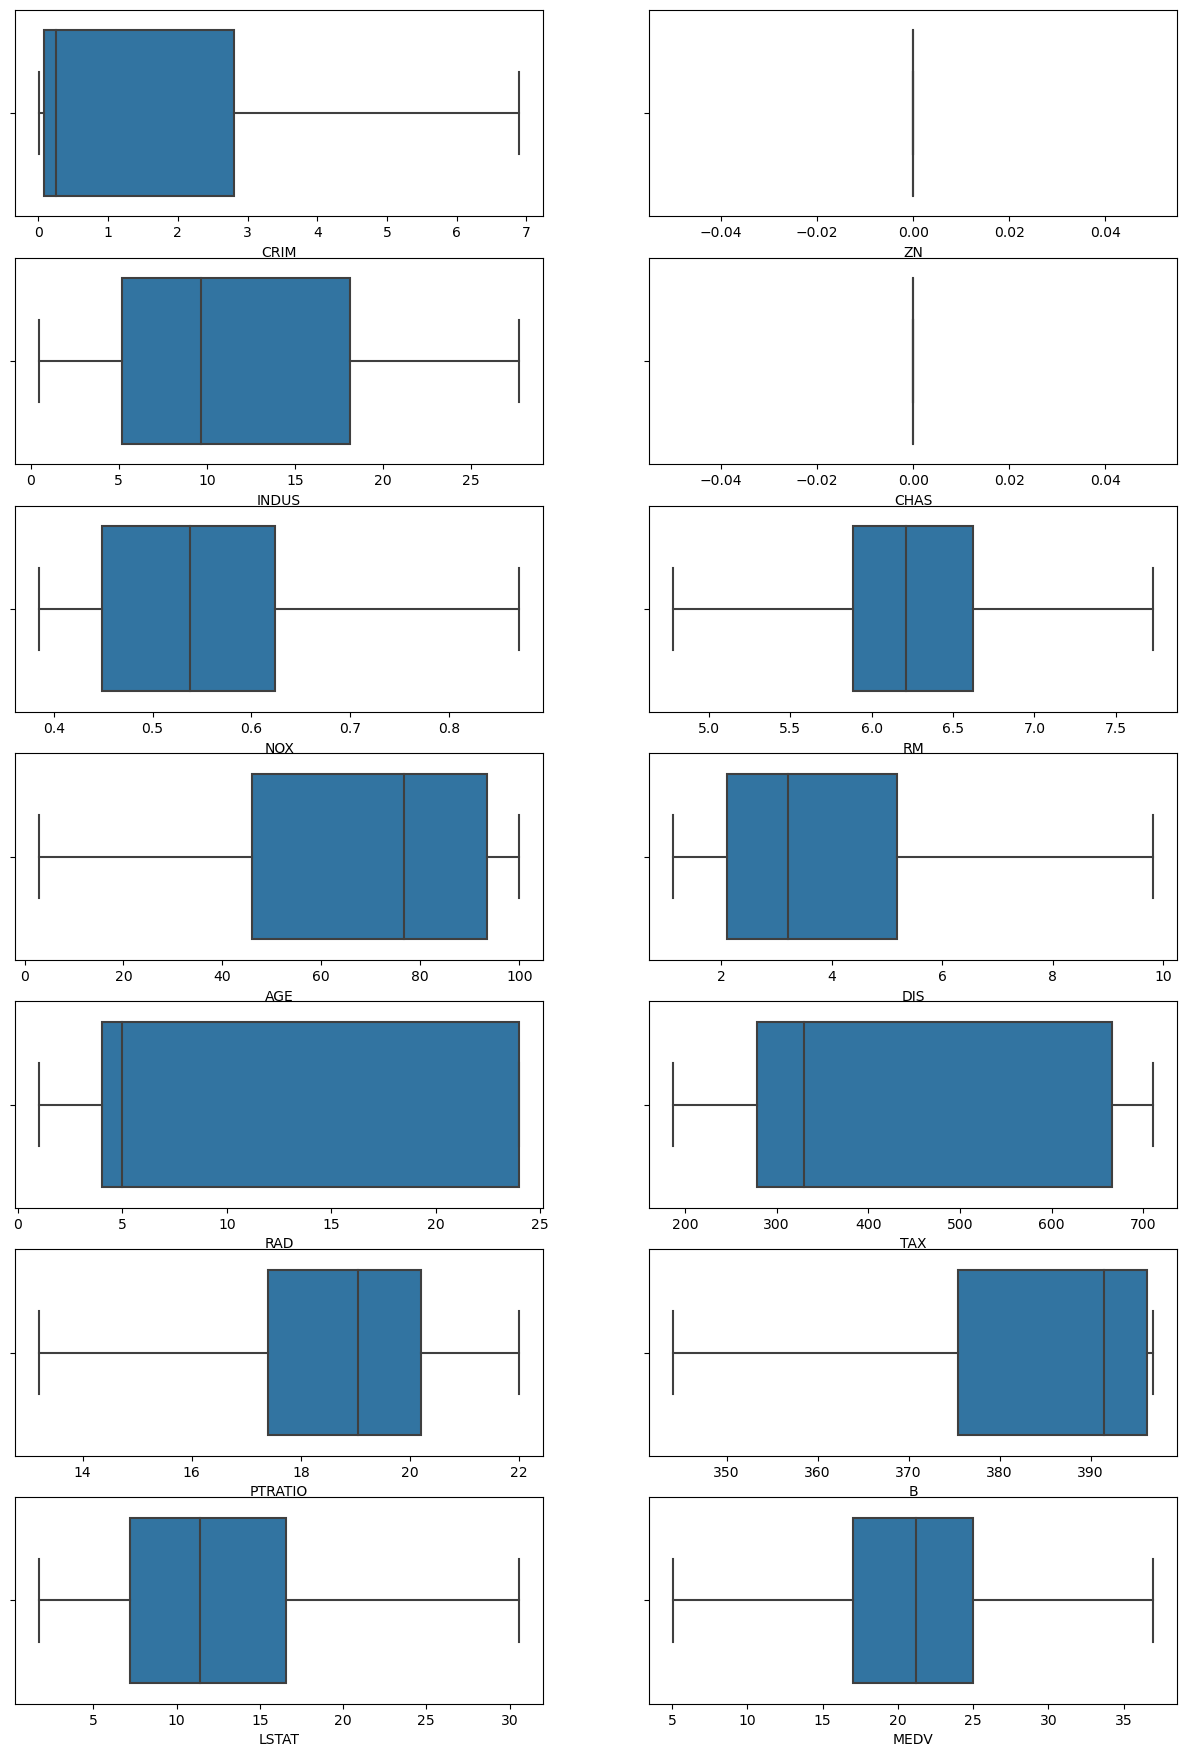

In [ ]:
plt.figure(figsize=(15,22))
plt.subplot(7,2,1)
sns.boxplot(data['CRIM'])
plt.subplot(7,2,2)
sns.boxplot(data['ZN'])
plt.subplot(7,2,3)
sns.boxplot(data['INDUS'])
plt.subplot(7,2,4)
sns.boxplot(data['CHAS'])
plt.subplot(7,2,5)
sns.boxplot(data['NOX'])
plt.subplot(7,2,6)
sns.boxplot(data['RM'])
plt.subplot(7,2,7)
sns.boxplot(data['AGE'])
plt.subplot(7,2,8)
sns.boxplot(data['DIS'])
plt.subplot(7,2,9)
sns.boxplot(data['RAD'])
plt.subplot(7,2,10)
sns.boxplot(data['TAX'])
plt.subplot(7,2,11)
sns.boxplot(data['PTRATIO'])
plt.subplot(7,2,12)
sns.boxplot(data['B'])
plt.subplot(7,2,13)
sns.boxplot(data['LSTAT'])
plt.subplot(7,2,14)
sns.boxplot(data['MEDV'])

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

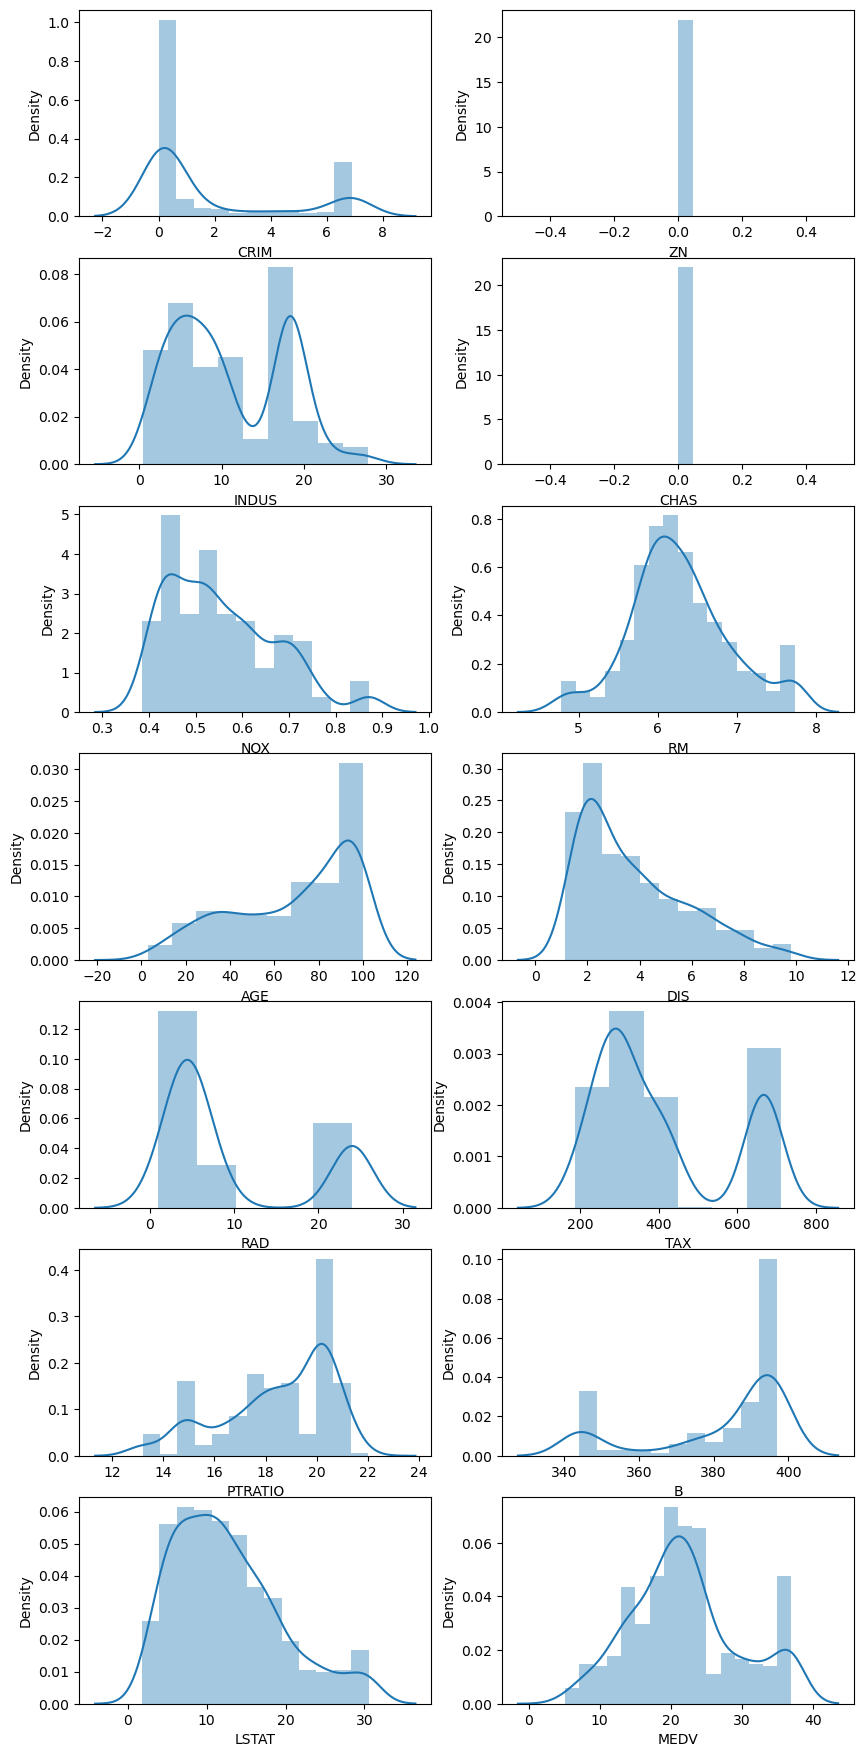

In [ ]:
plt.figure(figsize=(10,22))
plt.subplot(7,2,1)
sns.distplot(data['CRIM'])
plt.xlabel('CRIM')
plt.subplot(7,2,2)
sns.distplot(data['ZN'])
plt.subplot(7,2,3)
sns.distplot(data['INDUS'])
plt.subplot(7,2,4)
sns.distplot(data['CHAS'])
plt.subplot(7,2,5)
sns.distplot(data['NOX'])
plt.subplot(7,2,6)
sns.distplot(data['RM'])
plt.subplot(7,2,7)
sns.distplot(data['AGE'])
plt.subplot(7,2,8)
sns.distplot(data['DIS'])
plt.subplot(7,2,9)
sns.distplot(data['RAD'])
plt.subplot(7,2,10)
sns.distplot(data['TAX'])
plt.subplot(7,2,11)
sns.distplot(data['PTRATIO'])
plt.subplot(7,2,12)
sns.distplot(data['B'])
plt.subplot(7,2,13)
sns.distplot(data['LSTAT'])
plt.subplot(7,2,14)
sns.distplot(data['MEDV'])


In [ ]:
data.CHAS.values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
data.ZN.values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### since all the values in CHAS and ZN columns are zero so I decided to drop the both columns

In [ ]:
data=data.drop(['CHAS','ZN'],axis=1)

In [ ]:
data

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<Figure size 1200x2200 with 0 Axes>

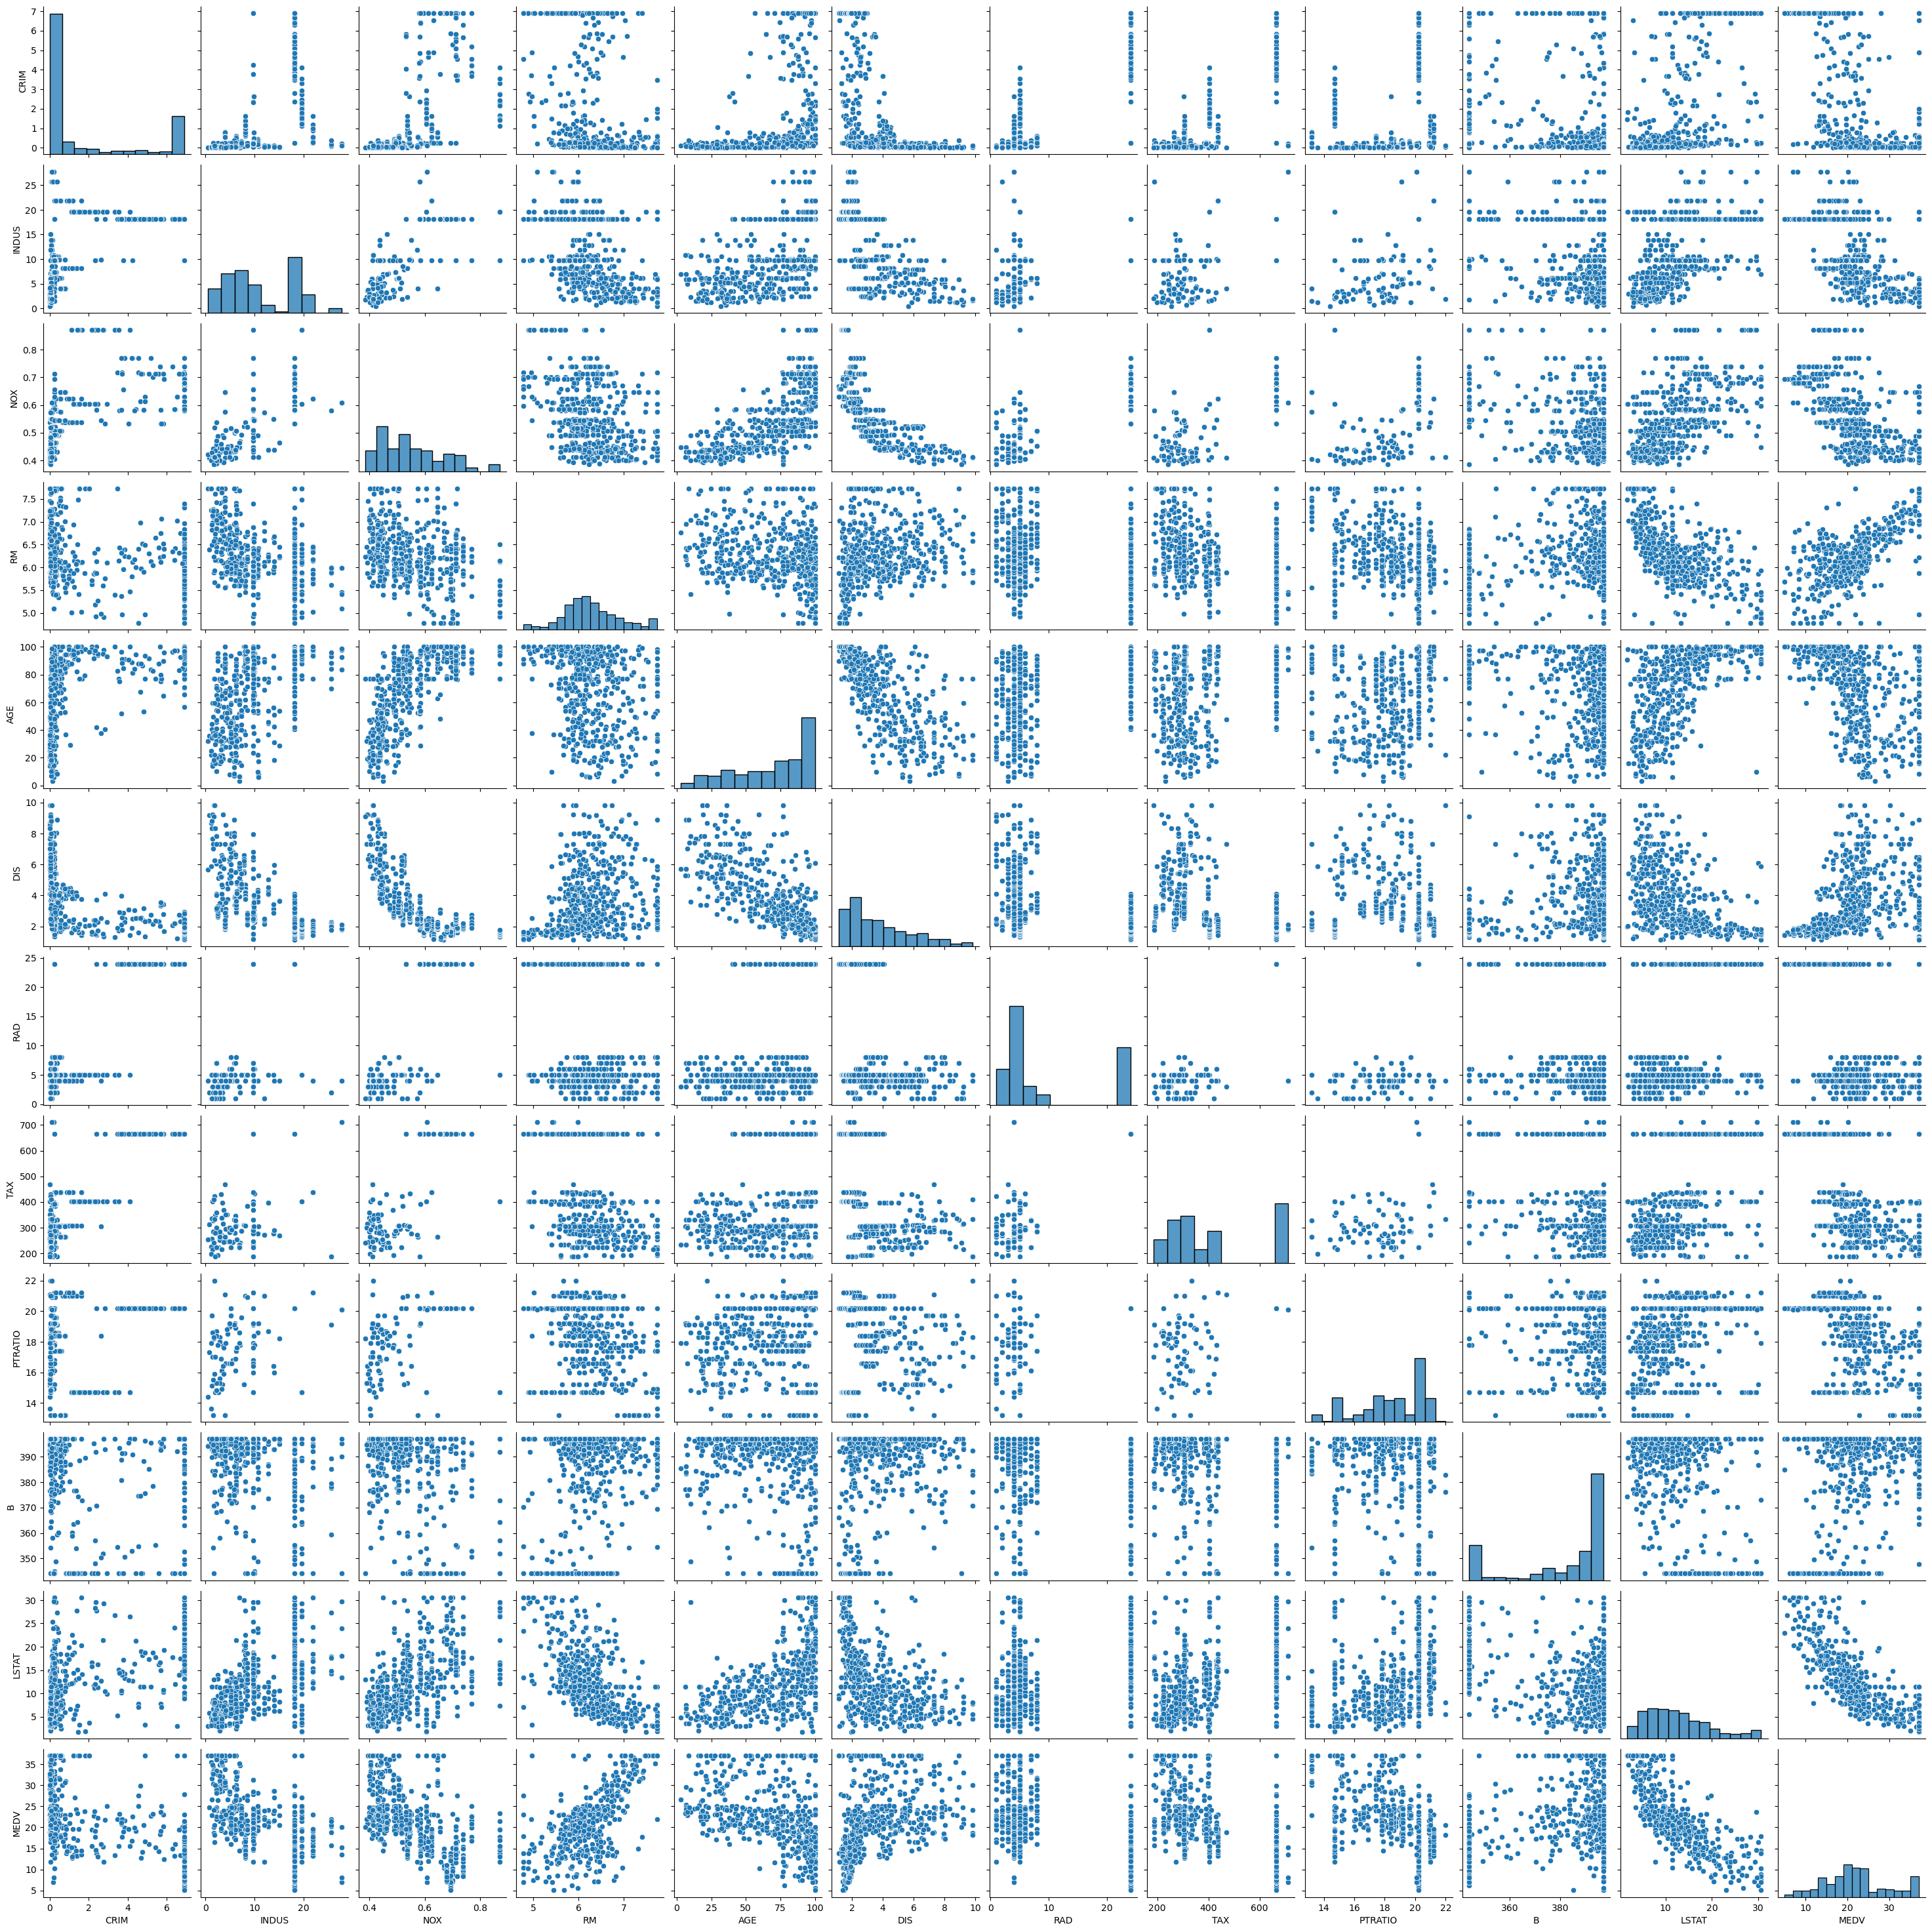

In [ ]:
plt.figure(figsize=(12,22))
sns.pairplot(data)

### Correlation between the columns

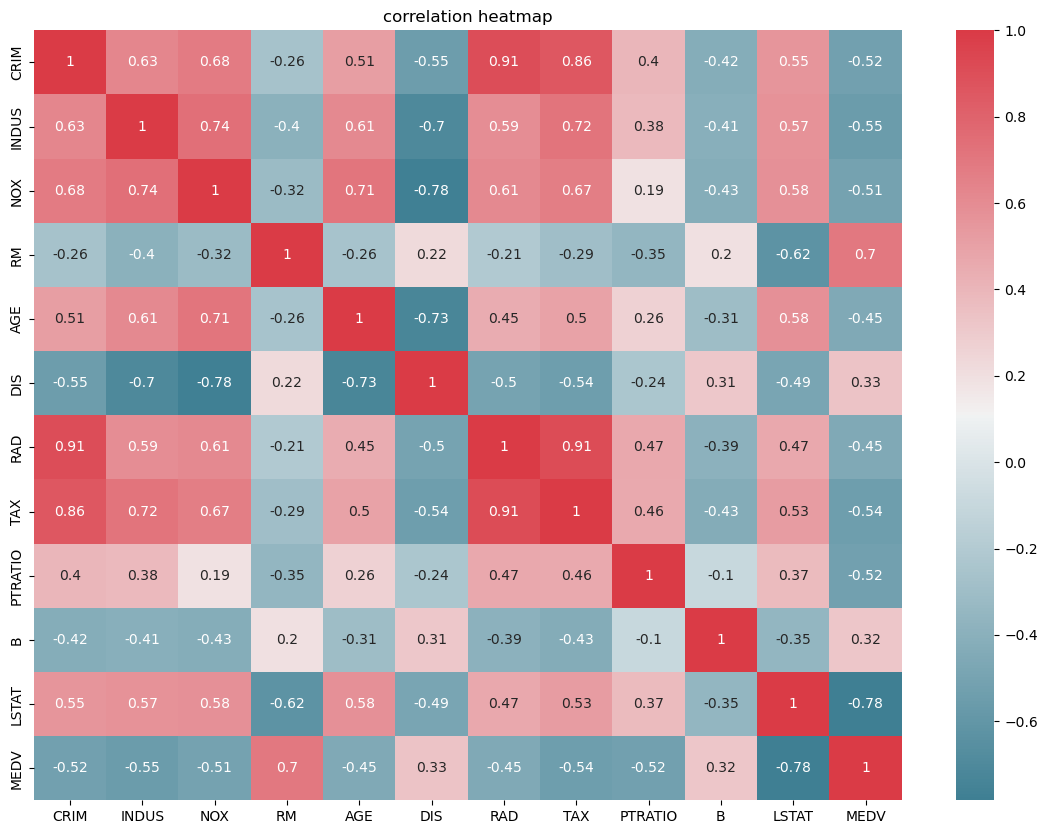

In [ ]:
corr=data.corr()
plt.figure(figsize=(14,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,annot=True,cmap=cmap)
plt.title("correlation heatmap")
plt.show()

##### as here we found that the RAD and TAX are highly correlated with each other , therefore we decided to drop the RAD column

In [ ]:
data=data.drop('RAD',axis=1)

### Final Data

In [ ]:
data

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273,21.0,391.99,11.43,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0


## Model Building

In [ ]:
X=data.drop(['MEDV'],axis=1)
Y=data.MEDV

In [ ]:
X

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,11.43
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273,21.0,391.99,11.43
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48


In [ ]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((404, 10), (404,), (102, 10), (102,))

In [ ]:
#defining the function to display the metrics related to the model
def model_report(model,X_train,y_train,X_test,y_test):
    y_pred = model.predict(X_test)
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    r_square =  r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))

    acc_matrices = {'Train accuracy':train_acc,'Test accuracy':test_acc,'r2_score':r_square,'MSE':mse,'RMSE':rmse}
    return acc_matrices

## Linear Regression

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model_report(linear_model,X_train,y_train,X_test,y_test)

{'Train accuracy': 0.7694332864865117,
 'Test accuracy': 0.718867538381458,
 'r2_score': 0.718867538381458,
 'MSE': 13.754391633468407,
 'RMSE': 3.7086913640081196}

In [ ]:
model={}

In [ ]:
model['Linear Regression']={'Train accuracy': 0.7694332864865117,
 'Test accuracy': 0.718867538381458,
 'r2_score': 0.718867538381458,
 'MSE': 13.754391633468407,
 'RMSE': 3.7086913640081196}

## Decision Tree

In [ ]:
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
model_report(tree,X_train,y_train,X_test,y_test)

{'Train accuracy': 1.0,
 'Test accuracy': 0.7020400084138945,
 'r2_score': 0.7020400084138945,
 'MSE': 14.577677696078434,
 'RMSE': 3.81807251058416}

In [ ]:
model['Decision Tree']={'Train accuracy': 1.0,
 'Test accuracy': 0.7020400084138945,
 'r2_score': 0.7020400084138945,
 'MSE': 14.577677696078434,
 'RMSE': 3.81807251058416}

## Random Forest

In [ ]:
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
model_report(forest,X_train,y_train,X_test,y_test)

{'Train accuracy': 0.9774491577091373,
 'Test accuracy': 0.8764427333422674,
 'r2_score': 0.8764427333422674,
 'MSE': 6.045033095741421,
 'RMSE': 2.4586649010675328}

In [ ]:
model['Random Forest']={'Train accuracy': 0.9774491577091373,
 'Test accuracy': 0.8764427333422674,
 'r2_score': 0.8764427333422674,
 'MSE': 6.045033095741421,
 'RMSE': 2.4586649010675328}

## Support Vector Machine

In [ ]:
svr=SVR()
svr.fit(X_train,y_train)

SVR()

In [ ]:
model_report(svr,X_train,y_train,X_test,y_test)

{'Train accuracy': 0.26409334192997314,
 'Test accuracy': 0.34465914137852516,
 'r2_score': 0.34465914137852516,
 'MSE': 32.0625187536106,
 'RMSE': 5.66237748243709}

In [ ]:
model['SVM']={'Train accuracy': 0.26409334192997314,
 'Test accuracy': 0.34465914137852516,
 'r2_score': 0.34465914137852516,
 'MSE': 32.0625187536106,
 'RMSE': 5.66237748243709}

## KNN

In [ ]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [ ]:
model_report(knn,X_train,y_train,X_test,y_test)

{'Train accuracy': 0.7174863052777892,
 'Test accuracy': 0.5473216066463871,
 'r2_score': 0.5473216066463871,
 'MSE': 22.14726776960785,
 'RMSE': 4.706088372481742}

In [ ]:
model['KNN']={'Train accuracy': 0.7174863052777892,
 'Test accuracy': 0.5473216066463871,
 'r2_score': 0.5473216066463871,
 'MSE': 22.14726776960785,
 'RMSE': 4.706088372481742}

In [ ]:
pd.DataFrame(model)

,Linear Regression,Decision Tree,Random Forest,SVM,KNN
Train accuracy,0.769433,1.000000,0.977449,0.264093,0.717486
Test accuracy,0.718868,0.702040,0.876443,0.344659,0.547322
r2_score,0.718868,0.702040,0.876443,0.344659,0.547322
MSE,13.754392,14.577678,6.045033,32.062519,22.147268
RMSE,3.708691,3.818073,2.458665,5.662377,4.706088


### as here we found that  Random Forest has high accuracy with good r square
#### So we finalize Random Forest and next we try to improve the R2 square and accuracy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
print('Random Forest Regression : ')
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)
print('Score : ', random_forest_regressor.score(X, Y))

Random Forest Regression : 
Score :  0.9594614661303362


### Finding the random state value in the train test split

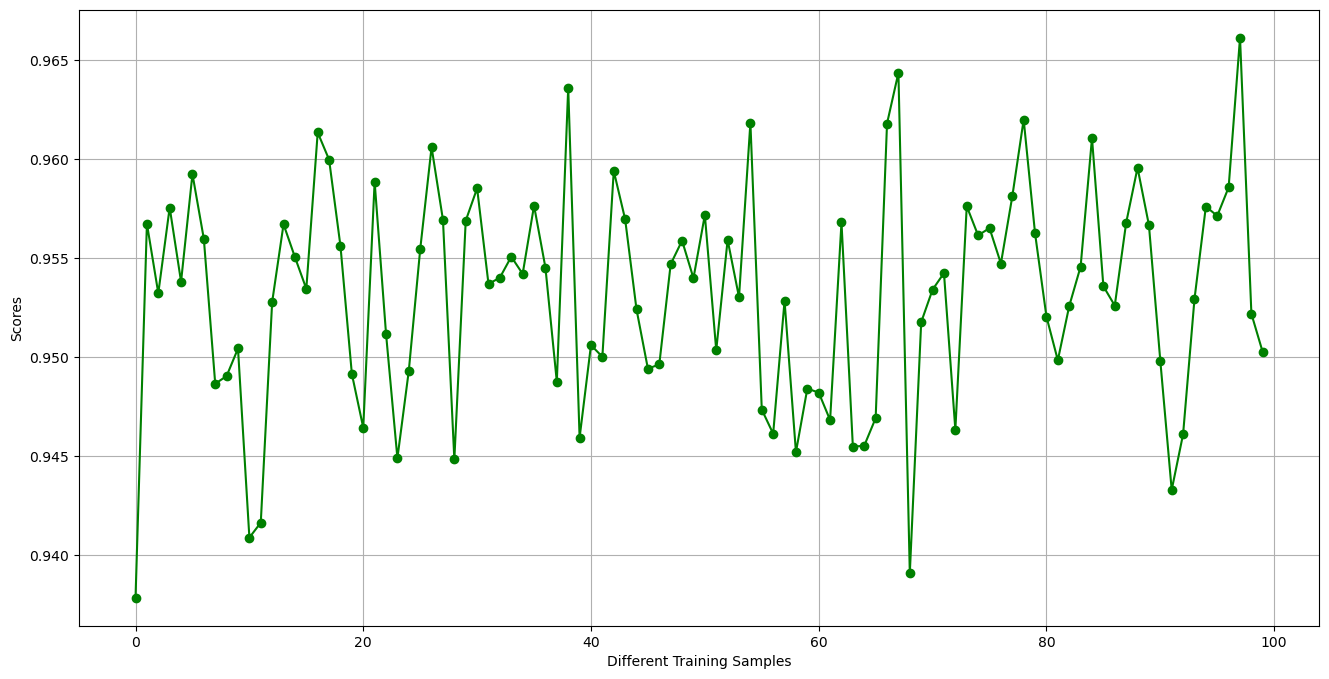

In [ ]:
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = i)
    random_forest_regressor = RandomForestRegressor()
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, Y))

plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'go-')
plt.xlabel('Different Training Samples')
plt.ylabel('Scores')
plt.grid()
plt.show()

### Here we found the Random State at 97 as high score hence we finalize it for train test split
#### Next we try to find the random state for the model

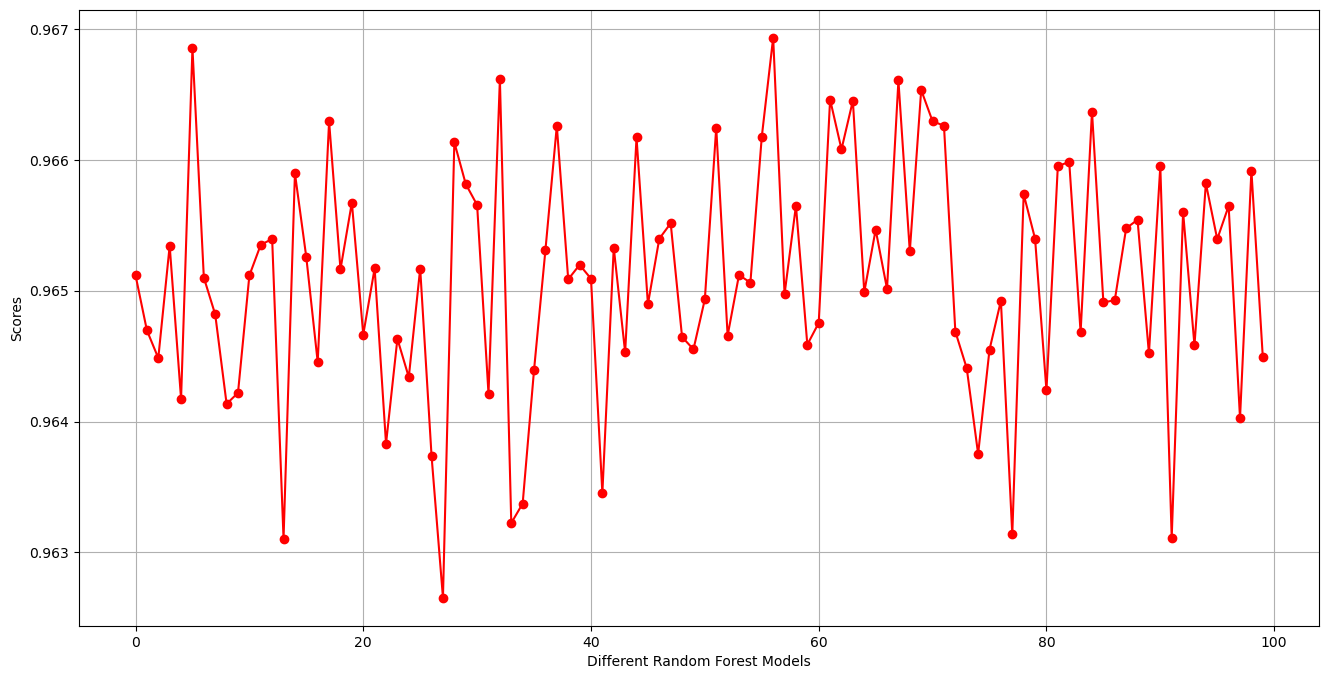

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 97)

scores = []
for i in range(100):
    random_forest_regressor = RandomForestRegressor(random_state = i)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, Y))

plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Different Random Forest Models')
plt.ylabel('Scores')
plt.grid()
plt.show()

### Here we found the random state at 56 as high score and hence we finalize it

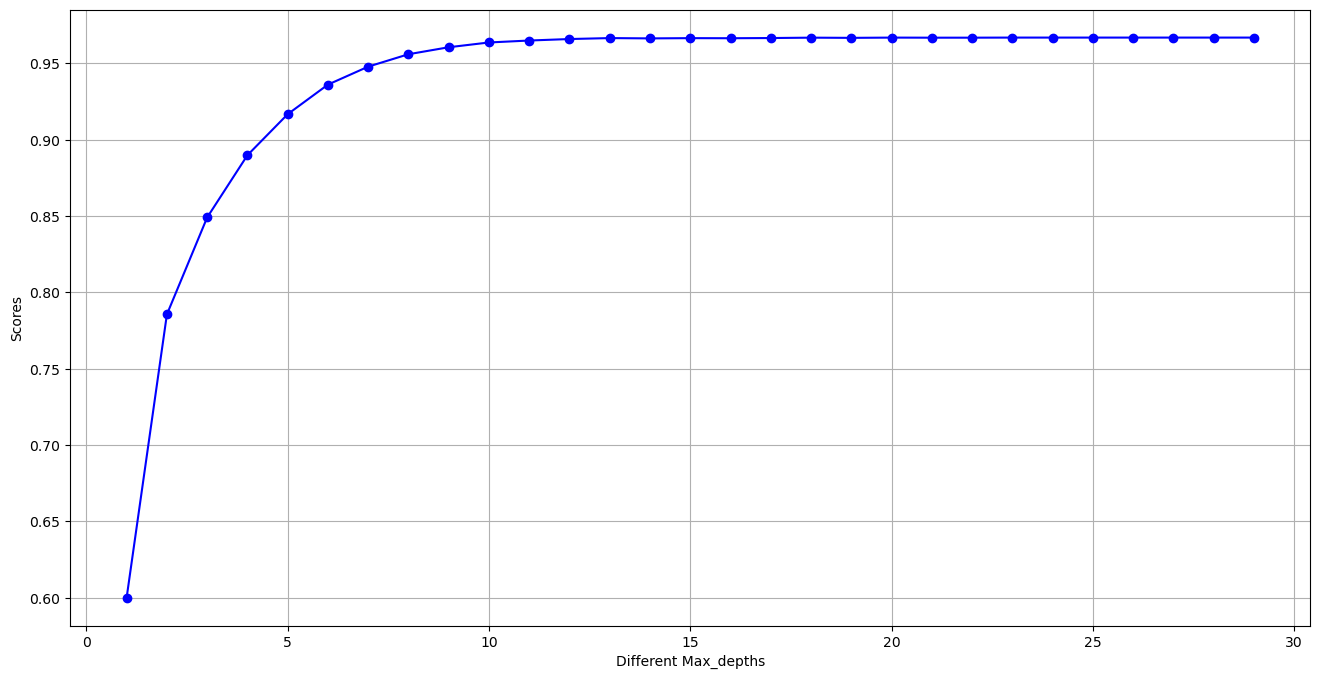

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 97)

scores = []
for i in range(1, 30):
    random_forest_regressor = RandomForestRegressor(max_depth = i, random_state = 56)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, Y))

plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.xlabel('Different Max_depths')
plt.ylabel('Scores')
plt.grid()
plt.show()

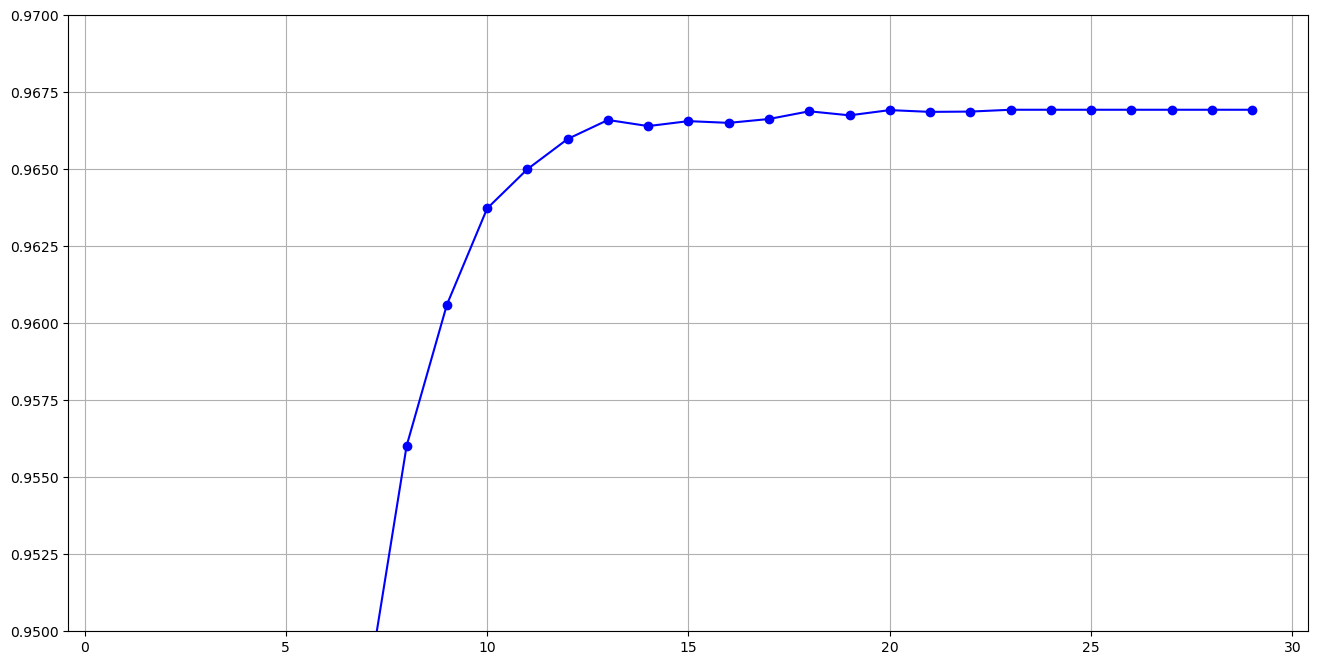

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.ylim(0.95, 0.97)
plt.grid()
plt.show()

### Here we found max_depth with 18 has high score

#### Hence we finalize random state 97
#### random state for model is 56
#### max_depth is 18

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 97)

model1=RandomForestRegressor(random_state=56,max_depth=18)
model1.fit(X_train,y_train)

print('Training Score : ', model1.score(X_train, y_train))
print('Testing Score  : ', model1.score(X_test, y_test))

y_pred=model1.predict(X_test)
print('R2 Score : ', r2_score(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

Training Score :  0.9805209204698224
Testing Score  :  0.9125137408732331
R2 Score :  0.9125137408732331
MSE :  5.066527243214204
RMSE: 2.2508947650243902


##### Overall score with the above finalized values for random forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 97)
print('Random Forest Regression : ')
random_forest_regressor = RandomForestRegressor(max_depth=18,random_state=56)
random_forest_regressor.fit(X_train, y_train)
print('Score : ', random_forest_regressor.score(X, Y))

Random Forest Regression : 
Score :  0.9668828704527077


### Feature Selection

In [ ]:
y = data['MEDV'].values
from sklearn.ensemble import ExtraTreesRegressor
etc = ExtraTreesRegressor()
etc.fit(data.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to House Price : ")
important_features = pd.Series(etc.feature_importances_*100, index = data.columns[:-1])
important_features

Percentage Importance of each features with respect to House Price : 


CRIM        6.938378
INDUS       2.741883
NOX         4.543314
RM         29.045505
AGE         2.118323
DIS         2.760820
TAX         5.655228
PTRATIO     5.162047
B           1.725229
LSTAT      39.309274
dtype: float64

In [ ]:
important_features.sort_values(ascending = False)

LSTAT      39.309274
RM         29.045505
CRIM        6.938378
TAX         5.655228
PTRATIO     5.162047
NOX         4.543314
DIS         2.760820
INDUS       2.741883
AGE         2.118323
B           1.725229
dtype: float64

In [ ]:
features_arranged_on_importance = important_features.sort_values(ascending = False).index
features_arranged_on_importance

Index(['LSTAT', 'RM', 'CRIM', 'TAX', 'PTRATIO', 'NOX', 'DIS', 'INDUS', 'AGE',
       'B'],
      dtype='object')

In [ ]:
y = data.MEDV

In [ ]:
new_data = data[features_arranged_on_importance] # arranging the data according to the importance scores
new_data

,LSTAT,RM,CRIM,TAX,PTRATIO,NOX,DIS,INDUS,AGE,B
0,4.98,6.575,0.00632,296,15.3,0.538,4.0900,2.31,65.2,396.90
1,9.14,6.421,0.02731,242,17.8,0.469,4.9671,7.07,78.9,396.90
2,4.03,7.185,0.02729,242,17.8,0.469,4.9671,7.07,61.1,392.83
3,2.94,6.998,0.03237,222,18.7,0.458,6.0622,2.18,45.8,394.63
4,11.43,7.147,0.06905,222,18.7,0.458,6.0622,2.18,54.2,396.90
...,...,...,...,...,...,...,...,...,...,...
501,11.43,6.593,0.06263,273,21.0,0.573,2.4786,11.93,69.1,391.99
502,9.08,6.120,0.04527,273,21.0,0.573,2.2875,11.93,76.7,396.90
503,5.64,6.976,0.06076,273,21.0,0.573,2.1675,11.93,91.0,396.90
504,6.48,6.794,0.10959,273,21.0,0.573,2.3889,11.93,89.3,393.45


In [ ]:
X1=new_data.iloc[:,:6] # considering the first 6 columns

In [ ]:
X1

,LSTAT,RM,CRIM,TAX,PTRATIO,NOX
0,4.98,6.575,0.00632,296,15.3,0.538
1,9.14,6.421,0.02731,242,17.8,0.469
2,4.03,7.185,0.02729,242,17.8,0.469
3,2.94,6.998,0.03237,222,18.7,0.458
4,11.43,7.147,0.06905,222,18.7,0.458
...,...,...,...,...,...,...
501,11.43,6.593,0.06263,273,21.0,0.573
502,9.08,6.120,0.04527,273,21.0,0.573
503,5.64,6.976,0.06076,273,21.0,0.573
504,6.48,6.794,0.10959,273,21.0,0.573


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.20, random_state = 97)
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(random_state=56,max_depth=18)
model2.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, random_state=56)

In [ ]:
model_report(model2,X_train,y_train,X_test,y_test)

{'Train accuracy': 0.9776573374152548,
 'Test accuracy': 0.9047471028850056,
 'r2_score': 0.9047471028850056,
 'MSE': 5.516310824639486,
 'RMSE': 2.34868278501791}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.20, random_state = 97)
print('Random Forest Regression : ')
model2= RandomForestRegressor(max_depth=18,random_state=56)
random_forest_regressor.fit(X_train, y_train)
print('Score : ', random_forest_regressor.score(X1, y))

Random Forest Regression : 
Score :  0.9630452872269168


### From the accuracy of the model with features as got 0.9668 and after consider the feature selection we got the accuarcy of 0.9630
#### Though their are not with much difference so we consider the final data without feature selection as the final model

## Final Model

In [ ]:
data

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273,21.0,391.99,11.43,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0


In [ ]:
X=data.drop('MEDV',axis=1)
Y=data.MEDV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 97)
print('Random Forest Regression : ')
random_forest_regressor = RandomForestRegressor(max_depth=18,random_state=56)
random_forest_regressor.fit(X_train, y_train)
print('Score : ', random_forest_regressor.score(X, Y))

Random Forest Regression : 
Score :  0.9668828704527077
